## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Basic package
import pandas as pd
import numpy as np

# Math package
import scipy
from scipy.stats import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import itertools
from itertools import combinations

# Plot package 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

# Others
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,221 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
# Read data into pandas dataframe
Censu = pd.read_csv(data_folder + "acs2015_county_data.csv")
Censu.head(3)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6


###  Task 1.A 
Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,221 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [4]:
# Show the data of income per cap and percentage of self-employed
Census_income_self = Censu[["IncomePerCap","SelfEmployed"]]
Census_income_self.head(3)

,IncomePerCap,SelfEmployed
0,24974,5.5
1,27317,5.8
2,16824,7.3


The pearson corelation coefficient between percentage of self-employed and income per cap is 0.087.
The spearman corelation coefficient between percentage of self-employed and income per cap is 0.056.


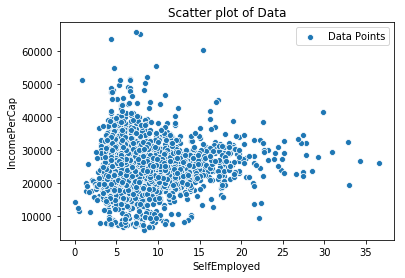

In [5]:
# Show the pearson corelation coefficient between percentage of self-employed and income per cap in all counties of all states
pear_coef = pearsonr(Census_income_self.SelfEmployed,Census_income_self.IncomePerCap)[0]
print("The pearson corelation coefficient between percentage of self-employed and income per cap is {p:.3f}.".format(p=pear_coef))

# Show the spearman corelation coefficient between percentage of self-employed and income per cap in all counties of all states
spearman_coef = spearmanr(Census_income_self.SelfEmployed,Census_income_self.IncomePerCap)[0]
print("The spearman corelation coefficient between percentage of self-employed and income per cap is {s:.3f}.".format(s=spearman_coef))

# plot the relationship between percentage of self-employed and income per cap 
sns.scatterplot(x="SelfEmployed", y="IncomePerCap",data=Census_income_self)
plt.title('Scatter plot of Data')
plt.legend(('Data Points', ))
plt.show()

⬆From above, we can conclude that: 
1. The Pearson and spearman corelation coefficient of these two variables is 0.087 (<0.7), which means that these two variables **do not have strong linear relation** in pearson view. 
2. When we look at the scatter plot above, it is shown that there is **no obvious linear relationship** between these two variables. 
3. Therefore, we confirm that these two variables are not correlated and we **can not decide** whether the citizens in counties that have a higher percentage of self-employed people earn more per capita or not.

### Task 1.B 
The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [6]:
# Filter out the data of income per cap and percentage of self-employed in set A
Censu_SetA = Censu.loc[Censu["State"].isin(["Wisconsin","Tennessee","Minnesota"])][["State","County","IncomePerCap","SelfEmployed"]]
Censu_SetA.head(3)

,State,County,IncomePerCap,SelfEmployed
1314,Minnesota,Aitkin,25591,9.2
1315,Minnesota,Anoka,31775,4.2
1316,Minnesota,Becker,26399,9.0


The pearson corelation coefficient between percentage of self-employed and income per cap in Set A is -0.202.


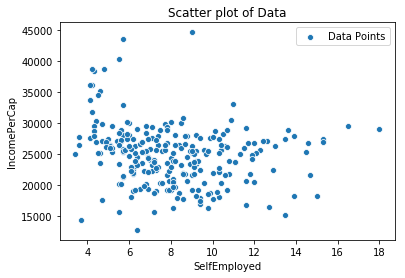

In [7]:
# Show the pearson corelation coefficient between percentage of self-employed and income per cap in set A
pear_coef_A=pearsonr(Censu_SetA.SelfEmployed,Censu_SetA.IncomePerCap)[0]
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Set A is {p:.3f}.".format(p=pear_coef_A))

# Plot the relationship between percentage of self-employed and income per cap in set A
sns.scatterplot(x="SelfEmployed", y="IncomePerCap",data=Censu_SetA)
plt.title('Scatter plot of Data')
plt.legend(('Data Points', ))
plt.show()

⬆From above, we can conclude that: 
1. First, we observe the Pearson corelation coefficient of these two variables in set B is -0.202 (<0.7), which means that these two variables **has very weak linear relation** in pearson view. 
2. Second, as the scatter plot shown, there are many points with a high SelfDmployed rate but a low InconePerCap, and some points with a low SelfDmployed but a high InconePerCap. In conclusion, the correlation between the SelfDmployedand the InconePerCap is **not striking**.

### Task 1.C  
In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [8]:
# Filter out the data of income per cap and percentage of self-employed of every states in set A
Censu_Wisconsin = Censu.loc[Censu["State"].isin(["Wisconsin"])][["County","IncomePerCap","SelfEmployed"]]
Censu_Tennessee = Censu.loc[Censu["State"].isin(["Tennessee"])][["County","IncomePerCap","SelfEmployed"]]
Censu_Minnesota = Censu.loc[Censu["State"].isin(["Minnesota"])][["County","IncomePerCap","SelfEmployed"]]

In [9]:
# Show the pearson corelation coefficient between percentage of self-employed and income per cap in every states in set A
pear_coef_Wisconsin=pearsonr(Censu_Wisconsin.SelfEmployed,Censu_Wisconsin.IncomePerCap)[0]
pear_coef_Tennessee=pearsonr(Censu_Tennessee.SelfEmployed,Censu_Tennessee.IncomePerCap)[0]
pear_coef_Minnesota=pearsonr(Censu_Minnesota.SelfEmployed,Censu_Minnesota.IncomePerCap)[0]

print("The pearson corelation coefficient between percentage of self-employed and income per cap in Wisconsi is {p:.3f}.".
      format(p=pear_coef_Wisconsin))
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Tennessee is {p:.3f}.".
      format(p=pear_coef_Tennessee))
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Minnesota is {p:.3f}.".
      format(p=pear_coef_Minnesota))

The pearson corelation coefficient between percentage of self-employed and income per cap in Wisconsi is -0.329.
The pearson corelation coefficient between percentage of self-employed and income per cap in Tennessee is -0.238.
The pearson corelation coefficient between percentage of self-employed and income per cap in Minnesota is -0.254.


⬆From above, we know that:
1. The pearson corelation coefficient between percentage of self-employed and income per cap in Wisconsi is -0.329.
2. Since Wisconsi's **absolute pearson corr value** is **largest**, 0.329 > 0.254 > 0.238, so we think state **Wisconsi** has the **strongest effect** of self-employment on per-capita income. 

### Task 1.D 
Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

```Step B```

In [10]:
# Filter out the data of income per cap and percentage of self-employed in set B
Censu_SetB = Censu.loc[Censu["State"].isin(["New Jersey","Kansas","Rhode Island"])][["State","County","IncomePerCap","SelfEmployed"]]
Censu_SetB.head(3)

,State,County,IncomePerCap,SelfEmployed
888,Kansas,Allen,20671,9.1
889,Kansas,Anderson,21226,18.7
890,Kansas,Atchison,21677,6.0


The pearson corelation coefficient between percentage of self-employed and income per cap in Set B is -0.232.


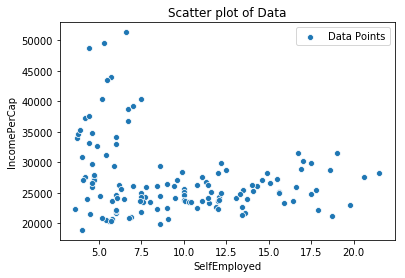

In [11]:
# show the pearson corelation coefficient between percentage of self-employed and income per cap in set B
pear_coef_B=pearsonr(Censu_SetB.SelfEmployed,Censu_SetB.IncomePerCap)[0]
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Set B is {p:.3f}.".format(p=pear_coef_B))

# plot the relationship between percentage of self-employed and income per cap in set B
sns.scatterplot(x="SelfEmployed", y="IncomePerCap",data=Censu_SetB)
plt.title('Scatter plot of Data')
plt.legend(('Data Points', ))
plt.show()

⬆From above, we can conclude that: 
1. The absolute Pearson corelation coefficient of these two variables is 0.232 (<0.7), which means that these two variables has **no strong linear correlation**.
2. Also, by observing the scatter plot above, it is shown that there is **no clear and visiable linear relationship** between these two variables. 

```Step c```

In [12]:
# Filter out the data of income per cap and percentage of self-employed of every states in set B
Censu_NewJ = Censu.loc[Censu["State"].isin(["New Jersey"])][["County","IncomePerCap","SelfEmployed"]]
Censu_Kansas = Censu.loc[Censu["State"].isin(["Kansas"])][["County","IncomePerCap","SelfEmployed"]]
Censu_RhodeI = Censu.loc[Censu["State"].isin(["Rhode Island"])][["County","IncomePerCap","SelfEmployed"]]

In [13]:
# Show the pearson corelation coefficient between percentage of self-employed and income per cap in every states in set B
pear_coef_NewJ=pearsonr(Censu_NewJ.SelfEmployed,Censu_NewJ.IncomePerCap)[0]
pear_coef_Kansas=pearsonr(Censu_Kansas.SelfEmployed,Censu_Kansas.IncomePerCap)[0]
pear_coef_RhodeI=pearsonr(Censu_RhodeI.SelfEmployed,Censu_RhodeI.IncomePerCap)[0]

print("The pearson corelation coefficient between percentage of self-employed and income per cap in New Jersey is {p:.3f}.".format(p=pear_coef_NewJ))
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Kansas is {p:.3f}.".format(p=pear_coef_Kansas))
print("The pearson corelation coefficient between percentage of self-employed and income per cap in Rhode Island is {p:.3f}.".format(p=pear_coef_RhodeI))

The pearson corelation coefficient between percentage of self-employed and income per cap in New Jersey is 0.480.
The pearson corelation coefficient between percentage of self-employed and income per cap in Kansas is 0.258.
The pearson corelation coefficient between percentage of self-employed and income per cap in Rhode Island is 0.902.


- Since only the pearson corelation coefficient of Rhode Island is high (0.902), we plot its scatterplot to check if the spurious corelation exists.

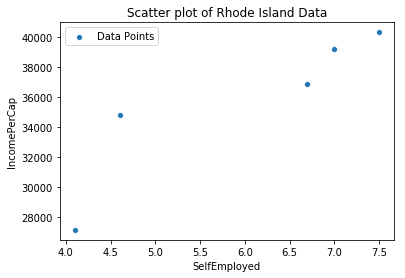

In [14]:
# Plot the relationship between percentage of self-employed and income per cap in Rhode Island
sns.scatterplot(x="SelfEmployed", y="IncomePerCap",data=Censu_RhodeI)
plt.title('Scatter plot of Rhode Island Data')
plt.legend(('Data Points', ))
plt.show()

- It seems that these two variable have a very strong linear relationship. Let's quantify this relationship by using regression coefficient.

The slope of the regression line is 3080.94.
The intercept of the regression line is 17246.60.


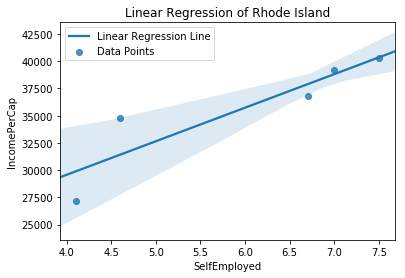

In [15]:
# Find out the regression coefficient of these two variables
slope, intercept, r_value, p_value, std_err =linregress(Censu_RhodeI.SelfEmployed,Censu_RhodeI.IncomePerCap)
print("The slope of the regression line is {s:.2f}.".format(s=slope))
print("The intercept of the regression line is {i:.2f}.".format(i=intercept))

# Plot the regression line
x = Censu_RhodeI.SelfEmployed
y = Censu_RhodeI.IncomePerCap
sns.regplot('SelfEmployed', 'IncomePerCap', Censu_RhodeI)
plt.title('Linear Regression of Rhode Island')
plt.legend(('Linear Regression Line', 'Data Points'))
plt.show()

We think state **Rhode Island** has the **strongest effect** of self-employment on per-capita income.  

```Explanation```:
1. The pearson corelation coefficient between percentage of self-employed and income per cap in Rhode Island is very high, 0.9 and Wisconsi's **absolute pearson corr value** is **largest**, 0.90 > 0.48 > 0.26.
2. After doing the linear regression, It is **obvious** that these two variables have a **strong linear relationship**.

We recommend **Set B** to incentivize self-employment.  

```Explanation```:

1. The pearson corelation coefficient between percentage of self-employed and income per cap in **Set B (0.90, 0.48, 0.26)** is **higher** that those in **Set A (0.33, 0.25, 0.24)**. 
2. Higher pearson corelation coefficient  value represents incentivizing self-employment can have a bigger possibility to get a higher per-capita income.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set.Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities.For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

### Task 2.A: Load the dataset and convert categorical features to a suitable numerical representation
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1. 

In [39]:
# Read data of requeired columns from csv file to pandas dataframe 
aac_intake_outcome = pd.read_csv(data_folder + "aac_intakes_outcomes.csv",usecols=['animal_type','intake_year','intake_condition'\
                                                                                   ,'intake_number','intake_type','sex_upon_intake'\
                                                                                   ,'age_upon_intake_(years)','time_in_shelter_days'\
                                                                                   ,'sex_upon_outcome','age_upon_outcome_(years)'\
                                                                                   ,'outcome_type'])
aac_intake_outcome.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


⬆Notice that:
1. **sex_upon_intake**: The gender of the animal and if it has been spayed or neutered at the time of intak.
2. **sex_upon_outcome**: The gender of the animal and if it has been spayed or neutered at time of outcome.
3. Each of these two data contains not only one information. So we sperate it into two columns for each, which are the information about whether the animal has been spayed or neutered (with column's name `sex_upon_intake(outcome)`) and the animal's gender (with column's name `sex_intake(outcome)`).

- We also process the gender data into one column (named `sex`) since an animal's gender should be same when intake and outcome.

In [40]:
# Split the each sex_upon_intake data into two columns 
sex_intake= aac_intake_outcome['sex_upon_intake'].str.split(' ',n = 1, expand = True)
# Set unknown for original unknown data
mask = sex_intake.applymap(lambda x: x is None)
sex_intake.loc[mask[1], 1] = 'Unknown'
# Set values for corresponding columns
aac_intake_outcome['sex_intake']=sex_intake[1]
aac_intake_outcome['sex_upon_intake']=sex_intake[0]

# Split the each sex_upon_outcome data into two columns 
sex_outcome= aac_intake_outcome['sex_upon_outcome'].str.split(' ',n = 1, expand = True)
# Set unknown for original unknown data
mask = sex_outcome.applymap(lambda x: x is None)
sex_outcome.loc[mask[1], 1] = 'Unknown'
# Set values for corresponding columns
aac_intake_outcome['sex_outcome']=sex_outcome[1]
aac_intake_outcome['sex_upon_outcome']=sex_outcome[0]

aac_intake_outcome.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_intake,sex_outcome
0,Return to Owner,Neutered,10.0,Dog,Normal,Stray,Neutered,10.0,2017,1.0,0.588194,Male,Male
1,Return to Owner,Neutered,7.0,Dog,Normal,Public Assist,Neutered,7.0,2014,2.0,1.259722,Male,Male
2,Return to Owner,Neutered,6.0,Dog,Normal,Public Assist,Neutered,6.0,2014,3.0,1.113889,Male,Male
3,Transfer,Neutered,10.0,Dog,Normal,Owner Surrender,Neutered,10.0,2014,1.0,4.970139,Male,Male
4,Return to Owner,Neutered,16.0,Dog,Injured,Public Assist,Neutered,16.0,2013,1.0,0.119444,Male,Male


- Generally speaking, the gender of intake and outcome is supposed to be the same, but we check it just in case.

In [41]:
# Check if gender is consistent
aac_intake_outcome[aac_intake_outcome['sex_intake'] != aac_intake_outcome['sex_outcome']]

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_intake,sex_outcome
6523,Return to Owner,NaN,7.0,Dog,Normal,Owner Surrender,NaN,7.0,2013,1.0,10.122222,NaN,NaN


⬆ As seen above, we know that:
1. The inconsistent data acutally is `nan` values, it doesn't mean their gender is not inconsistent.
2. We do not take any measure to deal with data with `nan` as it will be automatically processed in dummy data.(e.g. turn into (Neutered=0,sex=0)).

- Now we confirm that animals' gender are consistent when intake and outcome. Then we can merge sex_intake and sex_outcome into one columns (sex).

In [42]:
# Replace sex_outcome and sex_intake with sex 
aac_intake_outcome["sex"] = aac_intake_outcome['sex_outcome']
aac_intake_outcome.drop(['sex_outcome', 'sex_intake'], axis=1,inplace=True)
aac_intake_outcome[['sex']].head()

,sex
0,Male
1,Male
2,Male
3,Male
4,Male


Now we can get dummy data:
- We also rename some columns in the dummy data for the convenience to operate in the following steps.<br/>
- We also drop the columns related to original `outcome_type` but `adoption` one as it is actually what we want to predict as results.

In [43]:
# Get feature for dummy
aac_feature = ['animal_type','intake_year','intake_condition','intake_number','intake_type','sex_upon_intake','age_upon_intake_(years)'
               ,'time_in_shelter_days','sex_upon_outcome','age_upon_outcome_(years)','outcome_type','sex']
# Get dummies
aac_dummies = pd.get_dummies(aac_intake_outcome[aac_feature])
aac_dummies.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_Female,sex_Male,sex_Unknown
0,2017,1.0,10.0,0.588194,10.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2014,2.0,7.0,1.259722,7.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2014,3.0,6.0,1.113889,6.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2014,1.0,10.0,4.970139,10.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2013,1.0,16.0,0.119444,16.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
# --------- Rename the columns(just for convenience to do the next tasks) --------- #
# animal_type_xxx -> xxx
# intake_condition_xxx -> intake_xxx
# intake_type_xxx -> xxx_intake
# sex_upon_intake_xxx -> xxx_upon_intake
# sex_upon_outcome_xxx -> xxx_upon_outcome
# outcome_type_xxx -> xxx_outcome
# sex_xxx -> xxx (sex_unknown isn't changed)
aac_dummies.rename(columns={'animal_type_Bird':'bird','animal_type_Cat':'cat','animal_type_Dog':'dog','animal_type_Other':'other'
                            , 'intake_condition_Aged':'intake_aged','intake_condition_Feral':'intake_feral'
                            , 'intake_condition_Injured':'intake_injured','intake_condition_Normal':'intake_normal'
                            , 'intake_condition_Nursing':'intake_nursing','intake_condition_Other':'intake_other'
                            , 'intake_condition_Pregnant':'intake_pregnant','intake_condition_Sick':'intake_sick'
                            , 'intake_type_Euthanasia Request':'euthanasia_request_intake'
                            , 'intake_type_Owner Surrender':'owner_surrender_intake'
                            , 'intake_type_Public Assist':'public_assist_intake','intake_type_Stray':'stray_intake'
                            , 'intake_type_Wildlife':'wildlife_intake'
                            , 'sex_upon_intake_Intact':'intact_upon_intake', 'sex_upon_intake_Neutered':'neutered_upon_intake'
                            , 'sex_upon_intake_Spayed':'spayed_upon_intake', 'sex_upon_intake_Unknown':'unknown_upon_intake'
                            , 'sex_upon_outcome_Intact':'intact_upon_outcome', 'sex_upon_outcome_Neutered':'neutered_upon_outcome'
                            , 'sex_upon_outcome_Spayed':'spayed_upon_outcome', 'sex_upon_outcome_Unknown':'unknown_upon_outcome'
                            , 'outcome_type_Adoption':'adoption_outcome', 'outcome_type_Died':'died_outcome'
                            , 'outcome_type_Disposal':'disposal_outcome', 'outcome_type_Euthanasia':'euthanasia_outcome'
                            , 'outcome_type_Missing':'missing_outcome', 'outcome_type_Relocate':'relocate_outcome'
                            , 'outcome_type_Return to Owner':'rto_owner_outcome', 'outcome_type_Rto-Adopt':'rto_adopt_outcome'
                            , 'outcome_type_Transfer':'transfer_outcome'
                            , 'sex_Female':'female', 'sex_Male':'male', 'sex_Unknown':'sex_unknown'},inplace=True)
print("The columns name of aac_dummies dataframes: ")
aac_dummies.columns

The columns name of aac_dummies dataframes: 


Index(['intake_year', 'intake_number', 'age_upon_intake_(years)',
       'time_in_shelter_days', 'age_upon_outcome_(years)', 'bird', 'cat',
       'dog', 'other', 'intake_aged', 'intake_feral', 'intake_injured',
       'intake_normal', 'intake_nursing', 'intake_other', 'intake_pregnant',
       'intake_sick', 'euthanasia_request_intake', 'owner_surrender_intake',
       'public_assist_intake', 'stray_intake', 'wildlife_intake',
       'intact_upon_intake', 'neutered_upon_intake', 'spayed_upon_intake',
       'unknown_upon_intake', 'intact_upon_outcome', 'neutered_upon_outcome',
       'spayed_upon_outcome', 'unknown_upon_outcome', 'adoption_outcome',
       'died_outcome', 'disposal_outcome', 'euthanasia_outcome',
       'missing_outcome', 'relocate_outcome', 'rto_owner_outcome',
       'rto_adopt_outcome', 'transfer_outcome', 'female', 'male',
       'sex_unknown'],
      dtype='object')

- What we want to predict if the outcome type is adoption, so we drop those other outcome type columns.

In [45]:
# Drop columns of other outcome type
aac_dummies.drop(columns=['died_outcome', 'disposal_outcome', 'euthanasia_outcome',
       'missing_outcome', 'relocate_outcome', 'rto_owner_outcome',
       'rto_adopt_outcome', 'transfer_outcome'],axis=1,inplace= True)

For data standarization and data spliting, we build to function to implement them: 
- `standardize_data` for data standarization.
- `split_data` for data spliting.

In [46]:
def standardize_data(df,mean=None,std=None):
    """Standradize the data.
    
    Parameters:
    ----------
        df: pandas.dataframe
            dataframe to be standradized
    
    Returns:
    -------
        stdize_df: standradized dataframe
    """
    x = df
    if ((mean is None)&(std is None)):
        # training data stardization
        mean_x = x.mean()
        std_x = x.std()
        stdize_df = (x - mean_x) / std_x
    else:
        # test data stardization
        stdize_df = (x - mean) / std
    return stdize_df, mean, std

In [47]:
def split_data(df,ratio,seed=1):
    """Split the data into training set and test set
    
    Parameters:
    ----------
        df: dataframe
            dataframe to be standradized
        ratio: float
            the ratio of training data in original data-set
    
    Returns:
    -------
        df_tr: (pandas.dataframe) training data-set
        df_te: (pandas.dataframe) test data-set
    """
    # Set random seed
    np.random.seed(seed)
    # Generate indices,i.e. to get the index of training set and test set
    num_row = len(df)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # Split into training set and test set
    df_tr = df.loc[index_tr]
    df_te = df.loc[index_te]
    return df_tr,df_te

Next:
- We split it into 80% for training and 20% for test and derive the label and features from these two set.
- Then we standardize the train data-set and test data-set seperately. 

In [48]:
# Split data into 80% as training set and 20% as test set
aac_train, aac_test = split_data(aac_dummies,0.8)

# Reset index (otherwise it would raise error in the cross-validation)
aac_train.reset_index(inplace=True,drop=True)
aac_test.reset_index(inplace=True,drop=True)
# Derived label and features from training data and test data
x_tr= aac_train.loc[:, aac_train.columns != 'adoption_outcome']
y_tr= aac_train['adoption_outcome']
x_te = aac_test.loc[:,aac_test.columns != 'adoption_outcome']
y_te = aac_test['adoption_outcome']

# Standardize training data
x_tr,mean,std = standardize_data(x_tr)
x_te,_,_ = standardize_data(x_te)

# Check if the split is successful
len_train = len(aac_train)
len_test = len(aac_test)
len_origin=len(aac_dummies)
print("The counts of training set is {c}".format(c=len_train))
print("The counts of test set is {c}".format(c=len_test))
print("The sum of the counts of two sets is {s} which is equal to the counts({c}) of original data-set"\
      .format(s=len_train + len_test,c=len_origin))

The counts of training set is 63737
The counts of test set is 15935
The sum of the counts of two sets is 79672 which is equal to the counts(79672) of original data-set


### Task 2.B: Train a logistic regression classifier on your training set
- Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. 
- Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 
- Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. 
- The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

In [49]:
def compute_confusion_matrix(pre_test_bin, y_test):
    """Create a confusion matrix.
    
    Parameters:
    ----------
        pre_test_bin: array-like
            Binary prediction of sklearn model.
        y_test: array-like
            Real binary labels of test data.
            
    Returns:
    -------
        confus_mat: array-like
            Confusion matrix.
        pos_metric: list
            Accuracy, precision, recall, F1_score with respect to positive class.
        neg_metric: list
            Accuracy, precision, recall, F1_score with respect to negative class.    
    """
    
    #  ----------  Compute confusion matrix  ----------  #
    true_pos = np.sum(y_test[pre_test_bin[:, 1].astype(bool)]==1)
    false_pos = np.sum(y_test[pre_test_bin[:, 1].astype(bool)]==0)
    true_neg = np.sum(y_test[pre_test_bin[:, 0].astype(bool)]==0)
    false_neg = np.sum(y_test[pre_test_bin[:, 0].astype(bool)==1])
    confus_mat = np.array([[true_pos, false_pos], [false_neg, true_neg]])
    confus_mat = pd.DataFrame(confus_mat, index=['Adopted(Pred)', 'Not adopted(Pred)'], columns=['Adopted(Origin)', 'Not adopted(Origin)'])
    
    #  ----------  Compute accuracy, presicion, recall and F1-score for positive clasee ----------  #
    total_population = len(y_test)
    accuracy_pos = (true_pos + true_neg) / total_population
    precision_pos = true_pos / (true_pos + false_pos)
    recall_pos = true_pos / (true_pos + false_neg)
    F1_score_pos = 2 * precision_pos * recall_pos / (recall_pos + precision_pos)
    metric_pos = [accuracy_pos, precision_pos, recall_pos, F1_score_pos]
    #  ----------  Compute accuracy, presicion, recall and F1-score for negative clasee ----------  #
    accuracy_neg = (true_pos + true_neg) / total_population
    precision_neg = true_neg / (true_neg + false_neg)
    recall_neg = true_neg / (true_neg + false_pos)
    F1_score_neg = 2 * recall_neg * precision_neg / (recall_neg + precision_neg)
    metric_neg = [accuracy_neg, precision_neg, recall_neg, F1_score_neg]

    return confus_mat, metric_pos, metric_neg

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [19]:
# ----------  Logistic model training and prediction ----------  #
logistic = LogisticRegression(solver='lbfgs',max_iter=1000)
logistic.fit(x_tr, y_tr)
pre_test_pro = logistic.predict_proba(x_te)
pre_test_bin = (pre_test_pro > 0.5).astype(int)

# ----------  Calculate and display metric  ----------  #
confus_mat, metric_pos, metric_neg = compute_confusion_matrix(pre_test_bin, y_te)
print('For the decision threshold of 0.5, we present the performance of our classifier')
print('-------------------------------------------------------------------------------')
print('Confusion Matrix:\n{}\n'.format(confus_mat))
print('Metric with respect to the positive class (Threshold = 0.5):')
print('accuracy = {:.6f}, precision = {:.6f}, recall = {:.6f}, F1-score = {:.6f}\n'
      .format(metric_pos[0], metric_pos[1], metric_pos[2], metric_pos[3]))
print('Metric with respect to the negative class (Threshold = 0.5):')
print('accuracy = {:.6f}, precision = {:.6f}, recall = {:.6f}, F1-score = {:.6f}'
      .format(metric_neg[0], metric_neg[1], metric_neg[2], metric_neg[3]))

For the decision threshold of 0.5, we present the performance of our classifier
-------------------------------------------------------------------------------
Confusion Matrix:
                   Adopted(Origin)  Not adopted(Origin)
Adopted(Pred)                 5496                 1537
Not adopted(Pred)             1256                 7646

Metric with respect to the positive class (Threshold = 0.5):
accuracy = 0.824725, precision = 0.781459, recall = 0.813981, F1-score = 0.797388

Metric with respect to the negative class (Threshold = 0.5):
accuracy = 0.824725, precision = 0.858908, recall = 0.832626, F1-score = 0.845563


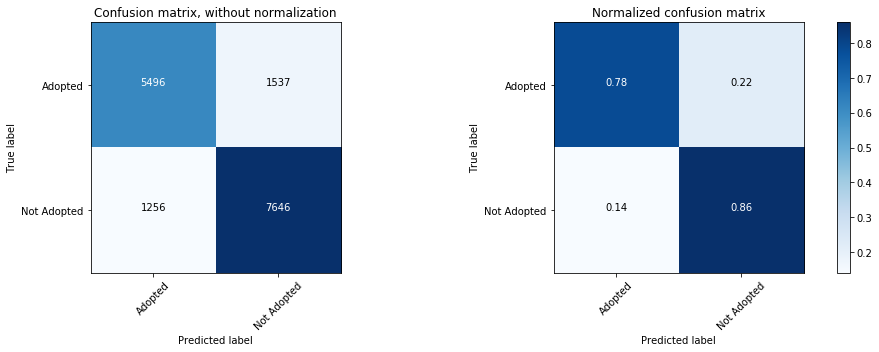

In [20]:
# ----------  Plot confusion matrix  ----------  #
class_names = ['Adopted','Not Adopted']
# Compute confusion matrix
cnf_matrix = confus_mat.values
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(16,5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

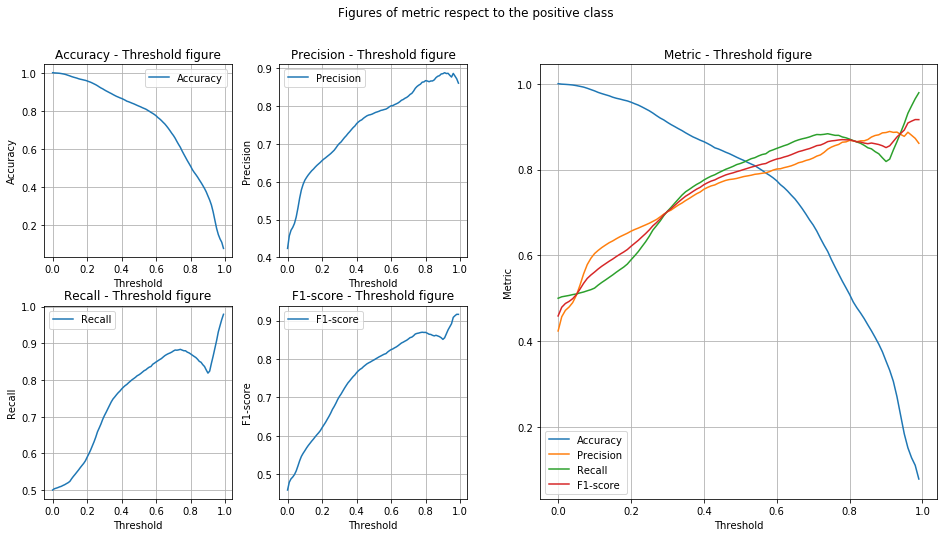

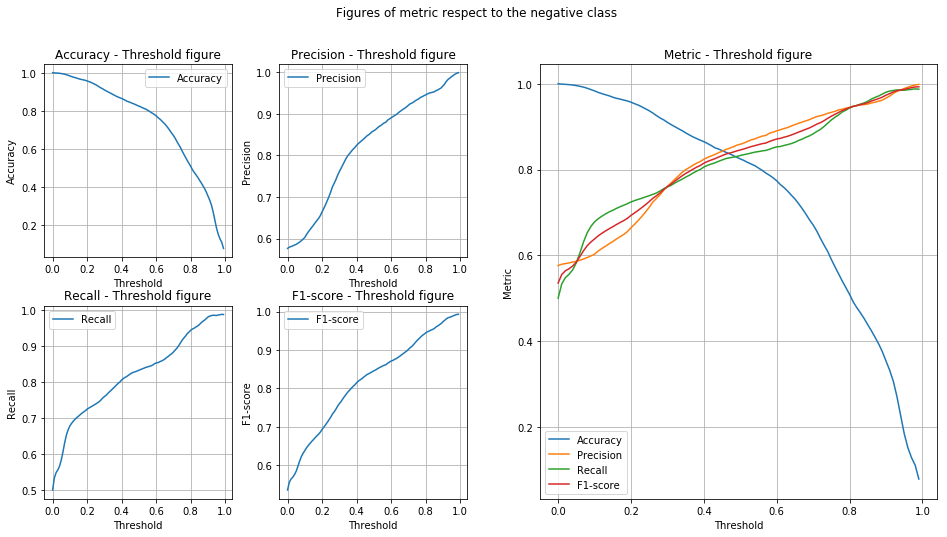

In [50]:
# ----------  Vary threshold and get the metric  ----------  #
pre_test_bin_list = []
metric_pos_list = np.ones([4, 1])
metric_neg_list = np.ones([4, 1])
k = np.linspace(0, 1, endpoint=False, num=100)
for threshold in np.linspace(0, 1, endpoint=False, num=100):
    pre_test_bin = (pre_test_pro >= threshold).astype(int)
    pre_test_bin_list.append(pre_test_bin)
    _, metric_pos, metric_neg = compute_confusion_matrix(pre_test_bin, y_te)
    metric_pos_list = np.concatenate((metric_pos_list, np.array(metric_pos).reshape((4,1))), axis = 1)
    metric_neg_list = np.concatenate((metric_neg_list, np.array(metric_neg).reshape((4,1))), axis = 1)
metric_pos_list = metric_pos_list[:, 1:]
metric_neg_list = metric_neg_list[:, 1:]

# ----------  Visualize the metric  ----------  #
metric_list = [metric_pos_list, metric_neg_list]
class_list = ['positive', 'negative']
label_list = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for class_index in range(2):
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(wspace=0.25,hspace=0.25)
    fig.suptitle('Figures of metric respect to the {} class'.format(class_list[class_index]))

    for index in range(4):
        plt.subplot(2, 4, int(index / 2) * 4 + index % 2 + 1)
        plt.plot(k, metric_list[class_index][index])
        plt.grid(True)
        plt.xlabel('Threshold')
        plt.ylabel(label_list[index])
        plt.legend([label_list[index]])
        plt.title('{} - Threshold figure'.format(label_list[index]))
    ax = plt.subplot(1, 2, 2)
    for index in range(4):  
        plt.grid(True)
        plt.plot(k, metric_list[class_index][index])
        plt.xlabel('Threshold')
        plt.ylabel('Metric')
        plt.legend(label_list)
        plt.title('Metric - Threshold figure')

We think that **Precision with respect to positive class** is most relevant in this scenario.

```Explanation```:
1. **Precision_pos = true_pos / (true_pos + false_pos)**, which means what fraction of positive examples did we recognize as such.
2. Because animals with a low probability of adoption will be put to sleep, we hope to ensure the **left animals** (which have a high probability of adoption and are classified as adoption) **be adopted** as much as they can.
3. We hope to set a high **Precision with respect to positive class** when choosing the threshold, which can make sure that the animals predicted to be adopted correctly adopted:-)

### Task 2.C Reduce the number of features by selecting the subset of the k best features. 
- Use greedy backward selection to iteratively remove features. 
- Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. 
- Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

In [29]:
def cross_validation_logistic(label, data, k, model):
    """Use cross-validation(Logistic Model) and compute average accurancy.
    
    Parameters:
    ----------
        label: pandas.DataFrame
            Binary prediction of sklearn model.
        data: pandas.DataFrame
            Real binary labels of test data.
        k: integer
            Number of folds.
        model:
            Training Model
            
    Returns:
    -------
        avg_accuracy: float
            Average accurancy with respect to positive class.
    """
    #  ----------  We use 0.5 as Threshold and accuracy as metric  ----------  #
    random_index = np.random.permutation(data.shape[0])
    accurancy_list = []
    model_list = []
    for index in range(k):
        # ----------  Calculate the indice of each fold  ----------  #
        k_index_start = int(index / k * data.shape[0])
        k_index_end = int((index + 1) / k * data.shape[0])
        k_test_index = random_index[np.arange(k_index_start, k_index_end)]
        
        k_train_index = np.ones(data.shape[0])
        k_train_index[np.arange(k_index_start, k_index_end)] = 0
        k_train_index = random_index[k_train_index == 1]
        
        # ----------  Use specific model and predict  ----------  #
        test_data = data.iloc[k_test_index]
        test_label = label[k_test_index]
        train_data = data.iloc[k_train_index]
        train_label = label[k_train_index]
        model_result = model.fit(train_data, train_label)
        
        pre_test_pro = model.predict_proba(test_data)
        pre_test_bin = (pre_test_pro > 0.5).astype(int)    
        
        # ----------  Calculate accuracy respect to positive degree  ----------  #
        true_pos = np.sum(test_label[pre_test_bin[:, 1].astype(bool)])
        true_neg = np.sum(test_label[pre_test_bin[:, 0].astype(bool)]==0)
        total_population = test_data.shape[0]
        accuracy_pos = (true_pos + true_neg) / total_population
        accurancy_list.append(accuracy_pos)
        
    avg_accuracy = np.mean(accurancy_list)
    return avg_accuracy

In [30]:
def greedy_backward_selection(X_train, y_train, X_test, y_test):
    """Use greedy backward selection to iteratively remove features.
    
    Parameters:
    ----------
        X_train: pandas.DataFrame
            Train data.
        y_train: pandas.DataFrame
            Real binary labels of train data.
        X_test: integer
            Test data.
        y_test:
            Real binary labels of test data.
            
    Returns:
    -------
        k_accurancy_list: list
            A list of accuracy calculated on test set.
        avg_accuracy: float
            Average accuracy when runing cross-validation on train set.
        feature_index_list: list
            Feature index in each loop. 
    """
    # ----------  Use greedy backward selection to iteratively remove features  ----------  #
    # ----------  Compute Initial accurancy  ----------  #
    logistic = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    pre_test_pro = logistic.predict_proba(X_test)
    pre_test_bin = (pre_test_pro > 0.5).astype(int)
    _, pos_metric, _ = compute_confusion_matrix(pre_test_bin, y_test)
    k_accurancy_list = [pos_metric[0]]
    k_avg_accurancy = [cross_validation_logistic(y_train, X_train, 5, LogisticRegression(solver='lbfgs'))]

    # ----------  Greedy backward selection  ----------  #
    feature_index = np.arange(X_train.shape[1])        # real indice of features
    feature_index_list = [feature_index]
    feature_aim = list(range(X_train.shape[1]))        # relative indice of features
    feather_len = len(feature_aim)

    while (feather_len > 1):
        # select optimal features for each step = 1 
        data_input = X_train.iloc[:, feature_index]  
        # combination
        feature_list = list(combinations(range(feather_len), feather_len - 1))    # 
        cv_list = []
        # For each scenario, compute its average accuracy by cv
        for index in feature_list:
            data_fea_sel = data_input.iloc[:, list(index)]
            cv_list.append(cross_validation_logistic(y_train, data_fea_sel, 5, LogisticRegression(solver='lbfgs')))

        # ----------  Find combination maximizing accurancy  ----------  #
        feature_aim = list(feature_list[np.argmax(cv_list)])
        feather_len = len(feature_aim)
        feature_index = feature_index[feature_aim]
        feature_index_list.append(feature_index)
        k_avg_accurancy.append(np.max(cv_list))

        # ----------  Use test data to test  ----------  #
        logistic = LogisticRegression(solver='lbfgs').fit(X_train.iloc[:, feature_index], y_train)
        pre_test_pro = logistic.predict_proba(X_test.iloc[:, feature_index])
        pre_test_bin = (pre_test_pro > 0.5).astype(int)
        _, pos_metric, _ = compute_confusion_matrix(pre_test_bin, y_test)
        k_accurancy_list.append(pos_metric[0])
    return k_accurancy_list, k_avg_accurancy, feature_index_list

```Explanation```:

1. For the greedy backward selection algorithm, we run cross-validation on training set to select features and the test set is only used to evaluate performance for the chosen k features.
2. In each loop, let's say we have ```i+1``` features. Then we check among all the possible combinations of ```i``` features and run 5-fold cross-validation on training set to get the average **accuracy with respect to positive class**.
3. Then we find one feature combination which has the best average accuracy with respect to positive class and regard these features as our aimed feature. We loop again, until we have only k remaining features.
4. Finally, we run our model on the test set to have a final estimation of our performance.

In [31]:
def plot_cv(k_accurancy_list, k_avg_accurancy,X_train):
# ----------  Plot Cross-validation max average accurancy - k  figure (Train set)   ----------  #
    k_point = [1, 5, 10, 15, 20, 25, 30]
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(wspace=0.25,hspace=0.25)
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(X_train.shape[1], 0, -1), k_avg_accurancy)
    plt.plot(np.array(k_point), (np.array(k_avg_accurancy[::-1]))[np.array(k_point) - 1], 'r*');
    plt.grid(True)
    plt.xlabel('k-Number of features')
    plt.ylabel('Max average accurancy')
    plt.legend(['Max average accurancy - k  line'])
    plt.title('Figure: Cross-validation max average accurancy - k')

    #  ----------  Plot Test set accurancy - k figure----------  #
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(X_train.shape[1], 0, -1), k_accurancy_list)
    plt.plot(np.array(k_point), (np.array(k_accurancy_list[::-1]))[np.array(k_point) - 1], 'r*');
    plt.grid(True)
    plt.xlabel('k-Number of features')
    plt.ylabel('Test Accurancy')
    plt.legend(['Accurancy - k line'])
    plt.title('Figure: Test set accurancy - k')
    plt.show()

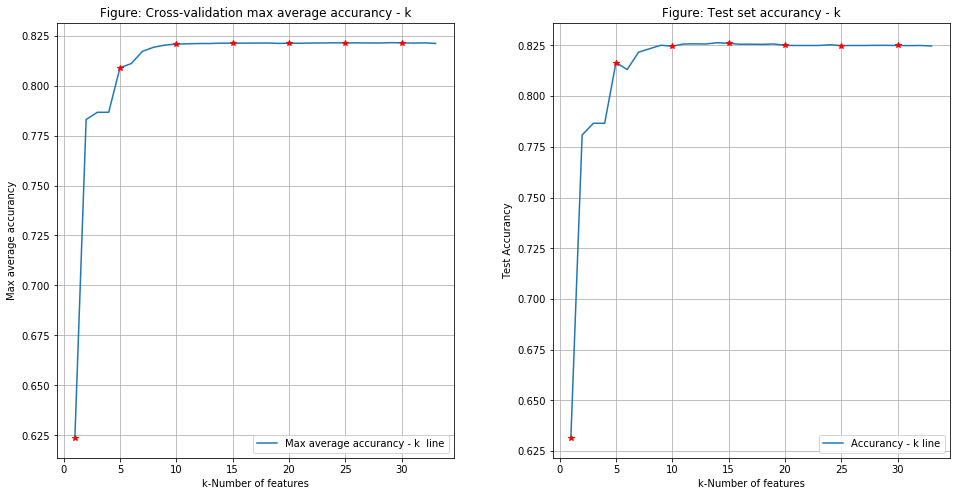

In [54]:
#  ----------  Run cross-validation and plot results  ----------  #
k_accurancy_list, k_avg_accurancy, feature_index_list= greedy_backward_selection(x_tr, y_tr,x_te,y_te)
plot_cv(k_accurancy_list, k_avg_accurancy,x_tr)

In [55]:
#  ----------  Print accuracy for k = 1, 5, 10, 15, 20, 25, 30  ----------  # 
k_point = [1, 5, 10, 15, 20, 25, 30]
k_point_df = pd.DataFrame({'k':[1, 5, 10, 15, 20, 25, 30], 
                           'Test set Accuracy':(np.array(k_accurancy_list[::-1]))[np.array(k_point) - 1]})
k_point_df.set_index('k')

,Test set Accuracy
k,
1,0.631440
5,0.816567
10,0.824600
15,0.826043
20,0.825039
25,0.824914
30,0.824976


⬆ From above, we know:
1. The performance of remaining features can be seen from the right figure 'Figure: Test set accurancy - k', which plots a function of accuracy on test set with k.
2. When we remove features, the performance (accuracy on test set) keeps stable until the number of remaining features reduce to 5.
3. If we continue to remove features when there are only 5 features left, the accuracy will decrease significantly.

In [1]:
#  ----------  Show top-5 features  ----------  #
print('The top-5 features that remain are:')
print(x_tr.columns[feature_index_list[::-1][4]].values)

The top-5 features that remain are:


NameError: name 'x_tr' is not defined

We choose 5 as the optimal k.

```Explanation```:
1. Because k = 5 is least number that can still keep the accuracy very close to the highest accuracy we can have, which ensures that we can have a good perform on these features.
2. We can see obviously from the figure that if we continue to remove features, the accuracy will decrease significantly.

The 5 optimal features are ```time_in_shelter_days```, ```public_assist_intake```, ```stray_intake```, ```intact_upon_intake```, ```unknown_upon_intake```.

```Explanation```:
1. ```time_in_shelter_days```: Animals may be taken good care of and be treated well in the shelter. Therefore, people may tend to adopt animals which have been kept in shelter for a certainly long time, which means the animals are much healthier.
2. ```public_assist_intake```: Animals which have public assist may reduce the economic feeding pressure of adoptor, so people may willing to adopt them.
3. ```stray_intake```: Strayed animals may arouse people's sympathy so that they are more likely to be adopted.
4. ```intact_upon_intake```: Obviously, the adopter may don't like spayed or neutered animals and hope the animals they adopted have intact sex.
5. ```unknown_upon_intake```: Sorry, we don't know...Those data may result from the mistake of recording.

###  Task 2.D Train a random forest. 
- Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". 
- For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

In this task, we use different way to implement the cross-validation.
1. We build a function called `build_k_indices` to build k indices used for cross-validation.
2. We also build a function for one-step cross-validation using random forest classifier called `cross_validation_rdmforest` 
3. The `run_cross_validation_rdmforest` function is used for grid search to tune the parameter and implement 5-fold cross-validation. We just chose 10 n_estimators and max_depths to find the best accuracy among them and the corresponding n_estimator and max_depth.

In [25]:
def build_k_indices(df, k_fold, seed=1):
    """build k indices for k-fold.
    
    Parameters:
    ----------
        df: pandas.DataFrame
            the dataframe need to be processed
        k_fold: integer
            Number of folds.
        seed: integer
            random seed
        
    Returns:
    -------
        array of indices
    """
    num_row = len(df)
    interval = int(num_row / k_fold)
    # resort the index randomly
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    # split k indices
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [26]:
def cross_validation_rdmforest(df_y, df_x, k_indices, k,n_est=None,max_dep=None):
    """Use cross-validation(random forest Model) and compute the accuracy.
    
    Parameters:
    ----------
        df_y: pandas.DataFrame
            labels of data
        df_x: pandas.DataFrame
            features of data
        k: integer
            current indice of k-fold
        n_est:
            the n_estimators parameter for RandomForestClassifier()
        max_dep:
            the max_depth parameter for RandomForestClassifier()
            
    Returns:
    -------
        accuracy of current fold of cross-validation
    """
    # assign the k-th indice to the test set and others to the training set
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = df_y.loc[te_indice]
    y_tr = df_y.loc[tr_indice]
    x_te = df_x.loc[te_indice]
    x_tr = df_x.loc[tr_indice]
    
    # training using random forest classifier
    if((n_est is None) | (max_dep is None)):
        raise ValueError('set values for n_estimators or max_depth')
    clf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep)
    clf.fit(x_tr, y_tr)
    # predict
    pred_cv = clf.predict_proba(x_te)
    
    # turn the prediction probability into 0(not adopted) and 1(adopted)
    pre_test_bin = (pred_cv > 0.5).astype(int)
    # compute accuracy
    _, metric_pos, _ = compute_confusion_matrix(pre_test_bin, y_te)
    accuracy = metric_pos[0]
    
    return accuracy

In [27]:
def run_cross_validation_rdmforest(df_y,df_x,k_fold,seed=1):
    """ 
        Tune parameters of RandomForestClassifier() using grid search,
        and 5-fold cross-validation.
    
     Parameters:
    ----------
        df_y: pandas.DataFrame
            labels of data
        df_x: pandas.DataFrame
            features of data
        k_fold: integer
            Number of folds.
        seed: integer
            random seed
            
    Returns:
    -------
        best_accuracy[ind_best] : best accuracy
        n_ests[ind_best]: corresponding n_estimator
        best_max_deps[ind_best]: corresponding max_depth
    """
    k_indices = build_k_indices(df_y, k_fold, seed) 
    # randomly choose some figures for tuning
    n_ests = np.array([10,20,30,40,50,60,70,80,90,100])
    max_deps = np.array([3,5,7,9,11,13,15])
    
    best_accuracy = []
    best_max_deps = []
    for n_est in n_ests:
        accuracy_te = []
        for max_dep in max_deps:
            accuracy_te_tmp = []
            # k_fold corss-validation
            for k in range(k_fold):
                accu = cross_validation_rdmforest(df_y, df_x, k_indices, k,n_est,max_dep)
                accuracy_te_tmp.append(accu)
            # get average accuracy
            accuracy_te.append(np.mean(accuracy_te_tmp)) 
        
        # get the best accuracy in max_depths set and the corresponding max_depth
        ind_accuracy_opt = np.argmax(accuracy_te)
        best_max_deps.append(max_deps[ind_accuracy_opt])
        best_accuracy.append(accuracy_te[ind_accuracy_opt])
        print("-------------n_estimators: {n}, max_depth: {m}, best_accuracy: {accu}-----------------".
              format(n=n_est, m=max_deps[ind_accuracy_opt], accu=accuracy_te[ind_accuracy_opt]))
    
    # get the best accuracy in both n_estimators and max_depths set and the corresponding n_estimator and max_depth
    ind_best = np.argmax(best_accuracy)
    print("*********Best n_estimator: {n}, best_max_depth: {m},  best accuracy: {accu}***********".
          format(n=n_ests[ind_best], m=best_max_deps[ind_best], accu=best_accuracy[ind_best]))
        
    return n_ests[ind_best], best_max_deps[ind_best], best_accuracy[ind_best]

Run 5-fold cross-validation to tune n_estimator and max_depth parameters

In [51]:
# run cross-validation 
n_est, max_dep, accu = run_cross_validation_rdmforest(y_tr,x_tr,5)

-------------n_estimators: 10, max_depth: 15, best_accuracy: 0.8534870950027458-----------------
-------------n_estimators: 20, max_depth: 15, best_accuracy: 0.8542559033498078-----------------
-------------n_estimators: 30, max_depth: 15, best_accuracy: 0.8550247116968699-----------------
-------------n_estimators: 40, max_depth: 15, best_accuracy: 0.8555895504824665-----------------
-------------n_estimators: 50, max_depth: 15, best_accuracy: 0.8556209304149996-----------------
-------------n_estimators: 60, max_depth: 15, best_accuracy: 0.8556052404487332-----------------
-------------n_estimators: 70, max_depth: 15, best_accuracy: 0.8554326508198008-----------------
-------------n_estimators: 80, max_depth: 15, best_accuracy: 0.8556366203812662-----------------
-------------n_estimators: 90, max_depth: 15, best_accuracy: 0.8559504197065977-----------------
-------------n_estimators: 100, max_depth: 15, best_accuracy: 0.8562485290656625-----------------
*********Best n_estimator: 10

Now we have got the fine-parameter to use in the random forest classifier model in which n_estimator = 100 and max_depth = 15.<br/>
Then we plug in to model and predict the label on test data.

In [52]:
# Train data
clf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep)
clf.fit(x_tr, y_tr)
# Predict
pred_rdm = clf.predict_proba(x_te)
# turn the prediction probability into 0(not adopted) and 1(adopted)
pre_test_bin = (pred_rdm > 0.5).astype(int)

# Calculate and display metric
print('For the decision threshold of 0.5, we present the performance of our classifier')
print('-------------------------------------------------------------------------------')
confus_mat, metric_pos, metric_neg = compute_confusion_matrix(pre_test_bin, y_te)
print('Confusion Matrix:\n{}\n'.format(confus_mat))
print('Metric with respect to the positive class (Threshold = 0.5):')
print('accuracy = {:.6f}, precision = {:.6f}, recall = {:.6f}, F1-score = {:.6f}\n'
      .format(metric_pos[0], metric_pos[1], metric_pos[2], metric_pos[3]))
print('Metric with respect to the negative class (Threshold = 0.5):')
print('accuracy = {:.6f}, precision = {:.6f}, recall = {:.6f}, F1-score = {:.6f}'
      .format(metric_neg[0], metric_neg[1], metric_neg[2], metric_neg[3]))

For the decision threshold of 0.5, we present the performance of our classifier
-------------------------------------------------------------------------------
Confusion Matrix:
                   Adopted(Origin)  Not adopted(Origin)
Adopted(Pred)                 5943                 1496
Not adopted(Pred)              809                 7687

Metric with respect to the positive class (Threshold = 0.5):
accuracy = 0.855350, precision = 0.798898, recall = 0.880184, F1-score = 0.837573

Metric with respect to the negative class (Threshold = 0.5):
accuracy = 0.855350, precision = 0.904779, recall = 0.837090, F1-score = 0.869619


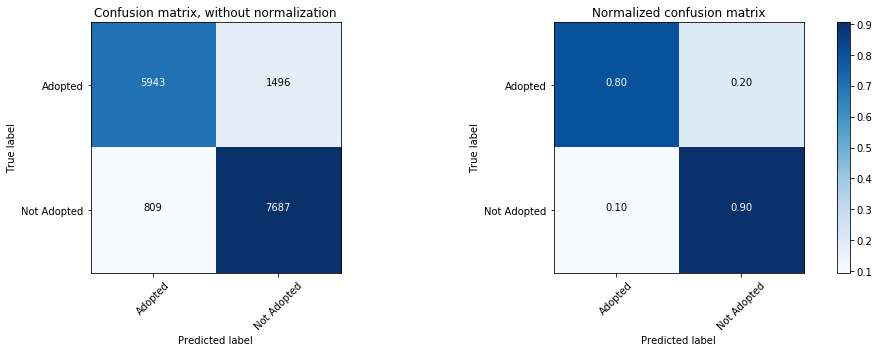

In [53]:
#  ----------  Plot the non-normalized confusion matrix and normalized confusion matrix  ----------  #
class_names = ['Adopted','Not Adopted']

# Compute confusion matrix
cnf_matrix = confus_mat.values
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(16,5))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The confusion matrix and other figures of `logistic regression` is shown below again (because it is too far from this task):<br/>
Confusion Matrix:

|     * | Adopted(Origin)     | Not adopted(Origin)    |
| ---------------- | -------------- | -------------- |
| Adopted(Pred)  | 5496  | 1537 |
| Not adopted(Pred)| 1256 | 7646 |

Metric with respect to the positive class (Threshold = 0.5):<br/>
accuracy = 0.824725, precision = 0.781459, recall = 0.813981, F1-score = 0.797388

Metric with respect to the negative class (Threshold = 0.5):<br/>
accuracy = 0.824725, precision = 0.858908, recall = 0.832626, F1-score = 0.845563

⬆ As is shown above, we know that:
1. Compared to the figures of logistic regression, all the figures in random forest classifier is obviously higher than those in logistic regression with respect to either positive class or negative class.